In [1]:
import os,pickle
import numpy as np
import matplotlib.pyplot as plt
from stackmaster.core import stack

/opt/anaconda3/lib/python3.8/site-packages/tslearn/clustering/kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [3]:
dataroot='../data'
dfile=dataroot+"/stackmaster_testdataset.pk"
d=pickle.load(open(dfile,'rb'))

## Now quick plots of the correlation results.

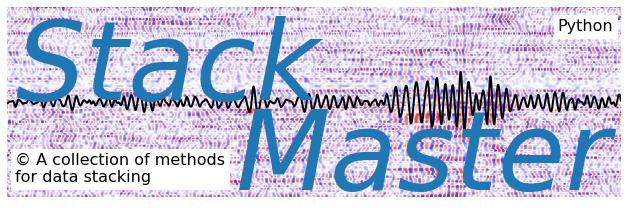

In [25]:
from scipy.signal import sosfiltfilt, butter
plt.figure(figsize=(11,3.5),facecolor="w")
scale=50
data=d["data"][270:350,:]
dt=d["dt"]
lag=d['lag']
side=d['side']
d_id=d['id']
tx=np.arange(-lag,lag+0.5*dt,dt)
extent=[-lag,lag,data.shape[0],0]
dn=data.copy()

sos=butter(4,[0.05,0.5],fs=1/dt,btype="bandpass",output='sos')


for i in range(data.shape[0]):
    dn[i,:]=sosfiltfilt(sos,data[i,:]/np.max(np.abs(data[i,:])))

plt.imshow(dn,extent=extent,cmap="seismic",aspect="auto",alpha=0.7)
dstack=stack(dn,method="robust")
plt.plot(tx,scale*dstack+0.5*data.shape[0],'k',lw=2)
plt.xlim([-200,200])
plt.ylim([0,data.shape[0]])
plt.text(-195,0.67*data.shape[0],"Stack",ha="left",va="center",fontsize=110,
        style="italic",color='tab:blue')
plt.text(193,0.2*data.shape[0],"Master",ha="right",va="center",fontsize=110,
        style="italic",color='tab:blue')
plt.text(-195,0.15*data.shape[0],"\xa9 A collection of methods\nfor data stacking",
         ha="left",va="center",fontsize=16,backgroundcolor='w')
plt.text(195,0.9*data.shape[0],"Python",
         ha="right",va="center",fontsize=16,backgroundcolor='w')
plt.axis('off')

plt.show()
    

## Stacking example

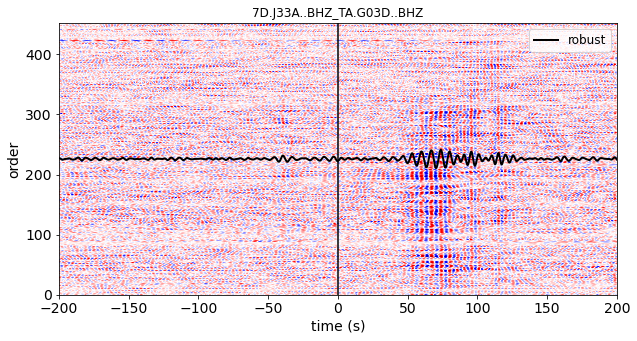

In [27]:
import os,pickle
import numpy as np
import matplotlib.pyplot as plt
from stackmaster.core import stack
from scipy.signal import sosfiltfilt, butter

dataroot='../data'
dfile=dataroot+"/stackmaster_testdataset.pk"
d=pickle.load(open(dfile,'rb'))

scale=60
data,dt,lag,d_id=[d["data"],d["dt"],d['lag'],d['id']]
tx=np.arange(-lag,lag+0.5*dt,dt)
extent=[-lag,lag,data.shape[0],0]
dn=data.copy()

sos=butter(4,[0.05,0.5],fs=1/dt,btype="bandpass",output='sos')

stack_method="robust"

for i in range(data.shape[0]):
    dn[i,:]=sosfiltfilt(sos,data[i,:]/np.max(np.abs(data[i,:])))

## plot
plt.figure(figsize=(10,5),facecolor="w")
plt.imshow(dn,extent=extent,cmap="seismic",aspect="auto")

dstack=stack(dn,method=stack_method)
plt.plot(tx,scale*dstack+0.5*data.shape[0],'k',lw=2,label=stack_method)
plt.vlines(0,0,data.shape[0],'k')
plt.xlim([-200,200])
plt.ylim([0,data.shape[0]])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(d_id)
plt.xlabel("time (s)",fontsize=14)
plt.ylabel("order",fontsize=14)
plt.legend(fontsize=12)
plt.show()